# Apply Machine Learning Algorithms to Predict Average Rating of Books

In this notebook we will run a few Regression Machine Learning Algorithms to predict the **Average_Rating** of books based on some other features that we have extraced and cleaned so far.  
<br>Let's do that in the following steps:
1. Remove Text Columns/ Features not so appealing for Predictive Modelling
2. Convert Boolean Featues or Categorical Variables to Integer(0/1) values
3. Split the data into Training and Test set
4. Train the Regression Models with our Training DataSet 
5. Evaluate and Compare Accuracy of the different Models using our Test Dataset

In this notebooks we are going to explore the below Models:
   - Linear Regression using statsmodels (Ordinary Least Squares (OLS))
   - Linear Regression using sckit-learn
   - Decision Tree
   - Random Forest
   - Support Vector Regression or SVR

#### Import Libraries

In [1]:
# Metrics
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# Model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#import statsmodels.api as sm
##Plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import itertools
import seaborn as sns
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

#### Import DataFrame For Modelling

In [2]:
%store -r df_details

In [3]:
df_details.head(2)

,book_id,isbn,title,total_pages,average_rating,ratings_count,reviews_count,publication_date,publisher,book_description,...,year,yearn,yet,york,young,younger,youth,zero,zombi,zone
0,1,0439785960,Harry Potter and the Half-Blood Prince (Harry ...,652.0,4.56,1940880,26187,2006-09-16,Scholastic Inc.,When Harry Potter and the Half-Blood Prince op...,...,1,0,1,0,0,0,0,0,0,0
1,2,0439358078,Harry Potter and the Order of the Phoenix (Har...,870.0,4.49,1993215,27553,2004-09-01,Scholastic Inc.,There is a door at the end of a silent corrido...,...,1,0,0,0,0,0,0,0,0,0


### Preprocessing Data before fitting a Model

#### Delete not-required columns

Let's clean up the dataframe and remove the columns which we are not going to use for Modelling.

In [4]:
del df_details["book_id"]
del df_details["isbn"]
del df_details["title"]
del df_details["ratings_count"]
del df_details["reviews_count"]
del df_details["publisher"]
del df_details["hometown"]
del df_details["publication_date"]
del df_details["book_description"]
del df_details["word_list"]
del df_details["author_id"]
del df_details["author_name"]
del df_details["birth_on"]
del df_details["death_on"]

#### Convert Boolean Columns to Integer Columns

In [5]:
df_details["classics"] = df_details["classics"].astype(int)
df_details["thriller"] = df_details["thriller"].astype(int)
df_details["comics"] = df_details["comics"].astype(int)
df_details["romance"] = df_details["romance"].astype(int)
df_details["paranormal"] = df_details["paranormal"].astype(int)
df_details["historical"] = df_details["historical"].astype(int)
df_details["humour"] = df_details["humour"].astype(int)
df_details["dystopian"] = df_details["dystopian"].astype(int)

#### Convert Gender column to Integer Column

In [6]:
df_details["gender"] = df_details["gender"].replace('female',0)
df_details["gender"] = df_details["gender"].replace('male',1)
df_details["gender"] = df_details["gender"].replace('genderqueer',1)

In [7]:
df_details.head(2)

,total_pages,average_rating,fans_count,gender,works_count,classics,thriller,romance,paranormal,humour,...,year,yearn,yet,york,young,younger,youth,zero,zombi,zone
0,652.0,4.56,198576,0,191,1,1,1,1,0,...,1,0,1,0,0,0,0,0,0,0
1,870.0,4.49,198576,0,191,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


Befor starting our Modelling part, let's take a final look at the Average_rating data.

#### Plot Average Rating

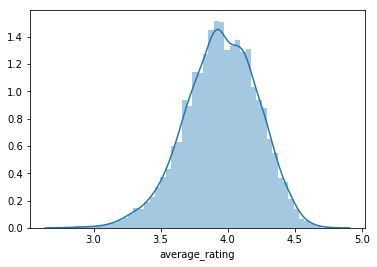

In [8]:
sns.distplot(df_details['average_rating'])

The Average Rating Data is Normally Distributed in our current Dataset.

## Apply Machine Learning Algorithms

#### Train Test Split

In [9]:
#X = df_details[df_details.columns - ["average_rating"],axis=1]
X = df_details.loc[:, df_details.columns != "average_rating"]
y = df_details.filter(['average_rating'],axis =1)

In [10]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7660, 2218)
(7660, 1)
(1916, 2218)
(1916, 1)


### Model 1: Train a Linear Regression With statsmodels

**Statsmodel** is a Python library designed for more statistically-oriented approaches to data analysis. It has some built in support for many of the statistical tests to check the quality of the fit and a dedicated set of plotting functions to visualize and diagnose the fit. 

In [12]:
### STATSMODELS ###
model_ols = ols(formula='y ~ X', data=df_details).fit()

In [13]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     2.612
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          5.05e-200
Time:                        12:30:36   Log-Likelihood:                 1641.5
No. Observations:                9576   AIC:                             1155.
Df Residuals:                    7357   BIC:                         1.706e+04
Df Model:                        2218                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8731      0.010    390.131      0.0

#### Predictions from OLS Model

In [14]:
# Predict values
y_pred_ols = model_ols.predict()
y_pred_ols = y_pred_ols.round(2)

The Adjusted $R^2$ Score using the Statsmodel is **0.272** which is not so good. Let's try some other models and see if we can get a better fit.

#### Plot Fitted Values Vs Residuals For Average Rating

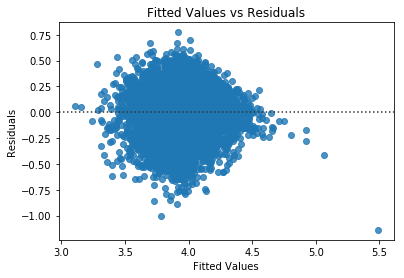

In [15]:
sns.residplot(model_ols.fittedvalues,model_ols.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title('Fitted Values vs Residuals')
plt.show()

#### Quantile Plot of the Residuals

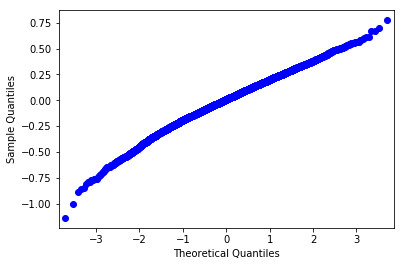

In [16]:
fig = sm.qqplot(model_ols.resid)
plt.show()

### Model 2: Train a Linear Regression Model With scikit-learn

In [17]:
# Create the regressor: reg
lm = linear_model.LinearRegression()
# Fit the regressor to the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Predictions from Linear Regression Model

In [18]:
# Predict on the test data: y_pred
y_pred_lm = lm.predict(X_test)
y_pred_lm = y_pred_lm.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For Linear Regression')

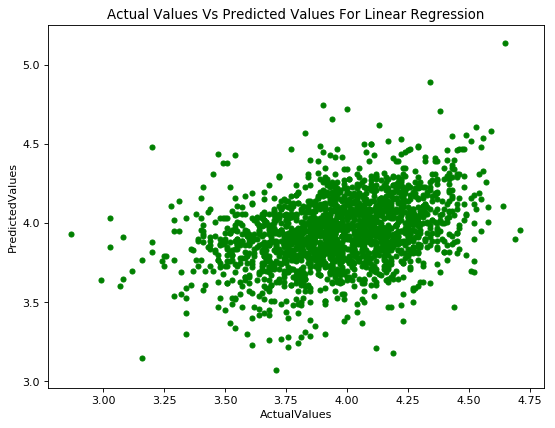

In [21]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_pred_lm,color = 'green', s= 20.0)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For Linear Regression")

In [19]:
print('R^2 Score for Linear Regression Model:', round(lm.score(X_test, y_test),4))
###. Using Metrics
print('Linear Regression Accuracy: ', metrics.r2_score(y_test, y_pred_lm))
print('Mean Absolute Error for Linear Regression Model:', round(metrics.mean_absolute_error(y_test, y_pred_lm),4))  
print('Mean Squared Error for Linear Regression Model:', round(metrics.mean_squared_error(y_test, y_pred_lm),4))   
print('Root Mean Squared Error for Linear Regression Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lm)),4))

R^2 Score for Linear Regression Model: -0.0999
Linear Regression Accuracy:  -0.10041472342313096
Mean Absolute Error for Linear Regression Model: 0.2187
Mean Squared Error for Linear Regression Model: 0.0789
Root Mean Squared Error for Linear Regression Model: 0.2809


R<sup>2</sup> score is -0.1 for the Linear Regression Model which means the Model does not follow the trend of the data and thus fits worse than a horizontal line.Let's use a 10 Fold Cross Validation and see the result.

#### Check Acuuracy using cross validation (KFold method)

In [20]:
y_pred_kf_lr = cross_val_predict(lm, X, y, cv=10 )
#Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  -0.037748184075384605


### Model 3: Train a Decision Tree Regression Model

In [22]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train,y_train)

#Predicting the AverageRating using test set 
y_pred_dt = dt_regressor.predict(X_test)
y_pred_dt = y_pred_dt.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For Decision Tree Regression')

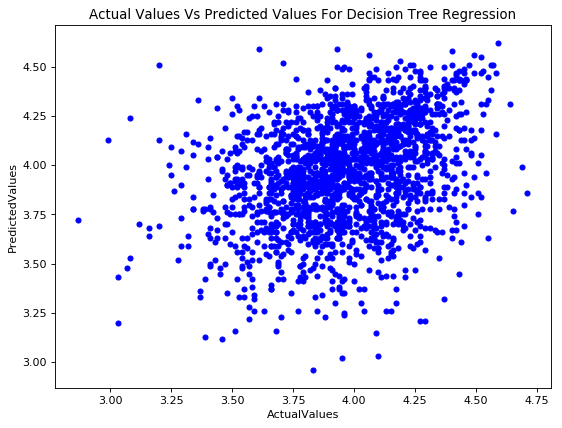

In [23]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_pred_dt,color = 'blue', s= 20.0)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For Decision Tree Regression")

In [24]:
print('R^2 Score for Decision Tree Regression Model:', round(dt_regressor.score(X_test, y_test),4))
###. Using Metrics
print('Decision Tree Regression Accuracy: ', metrics.r2_score(y_test, y_pred_dt))
print('Mean Absolute Error for Decision Tree Regression Model:', round(metrics.mean_absolute_error(y_test, y_pred_dt),4))  
print('Mean Squared Error for Decision Tree Regression Model:', round(metrics.mean_squared_error(y_test, y_pred_dt),4))   
print('Root Mean Squared Error for Decision Tree Regression Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)),4))

R^2 Score for Decision Tree Regression Model: -0.304
Decision Tree Regression Accuracy:  -0.3041445345845999
Mean Absolute Error for Decision Tree Regression Model: 0.2346
Mean Squared Error for Decision Tree Regression Model: 0.0935
Root Mean Squared Error for Decision Tree Regression Model: 0.3058


R<sup>2</sup> score is more negative for the Decision Tree Model. So,even a Decision Tree is not our answer!

#### Check Accuracy of the Model using cross validation (KFold method)

In [25]:
#Predicting the AverageRating using cross validation (KFold method)
y_pred_dt = cross_val_predict(dt_regressor, X, y, cv=10 )
#Decision Tree Regression Accuracy with cross validation
accuracy_dt = metrics.r2_score(y, y_pred_dt)
print('Cross-Predicted(KFold) Decision Tree Regression Accuracy: ', accuracy_dt)

Cross-Predicted(KFold) Decision Tree Regression Accuracy:  -0.36010702534460637


### Model 4: Train a Random Forest Model

In [26]:
# Establish model
rf = RandomForestRegressor(random_state = 42)
# Try different numbers of n_estimators 
estimators = [5, 20, 50, 100, 200]
score = []
for n in estimators:
    rf.set_params(n_estimators=n, max_depth=None)
    rf.fit(X_train, y_train)
    score.append(rf.score(X_test, y_test))

#### Plot the Score for Different Estimator Values

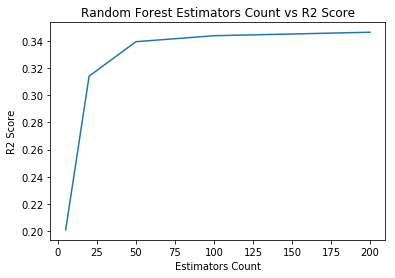

In [27]:
_ = plt.plot(estimators,score)
_ = plt.xlabel("Estimators Count")
_ = plt.ylabel("R2 Score")
_ = plt.title("Random Forest Estimators Count vs R2 Score")
plt.show()

At around 150 estimators, the score seems to get stable and not increasing anymore. So, let's settle down with 150 estimators.

#### Plot Features Importance

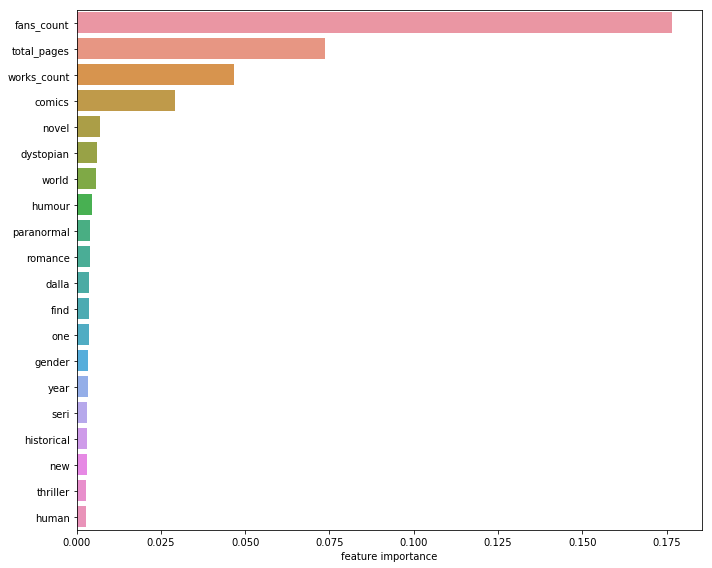

In [28]:
f, ax = plt.subplots(figsize=(10, 8))
ranking = np.argsort(-rf.feature_importances_)
ax = sns.barplot(x=rf.feature_importances_[ranking][:20], y=X_train.columns.values[ranking][:20], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

#### Explore Parameters of the Random Forest

In [29]:
feature_importances = rf.feature_importances_[ranking]
sorted_importances = [importance for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 1374


In [30]:
# Create training and testing sets with only the important features
X_imp_train = X_train.iloc[:,ranking[:1374]]
X_imp_test  = X_test.iloc[:,ranking[:1374]]

In [31]:
sample_leaf_options = [1,5,10,20,50]
for leaf_size in sample_leaf_options :
    rf_imp = RandomForestRegressor(n_estimators = 150,min_samples_leaf = leaf_size, max_features = 0.7)
    fit_imp = rf_imp.fit(X_imp_train, y_train)
    print(rf_imp.score(X_imp_test, y_test))

0.3422120225059584
0.34543362713401815
0.32441022717443935
0.30409405846712556
0.2597611628353782


### Random Forest Final Version

In [32]:
rf_final = RandomForestRegressor(n_estimators = 150, random_state = 42)
fit_final = rf_final.fit(X_imp_train, y_train)

#### Predictions from Final Random Forest Model

In [33]:
y_rf_final = rf_final.predict(X_imp_test)  
y_rf_final = y_rf_final.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For Random Forest')

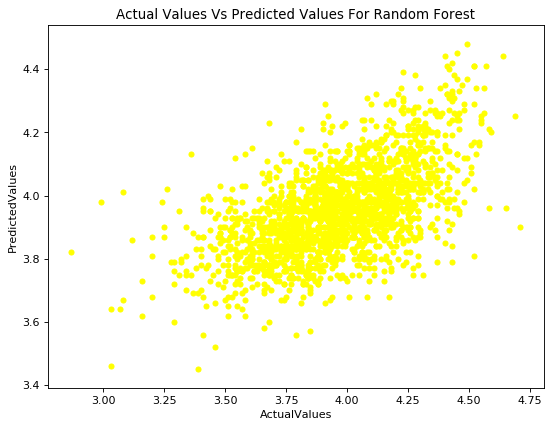

In [34]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_rf_final,color = 'yellow', s= 20.0)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For Random Forest")

In [35]:
print('R^2 Score for Random Forest Model:', round(rf_final.score(X_imp_test, y_test),4))
###. Using Metrics
print('Random Forest Accuracy: ', metrics.r2_score(y_test, y_rf_final))
print('Mean Absolute Error for Random Forest Model:', round(metrics.mean_absolute_error(y_test, y_rf_final),4))  
print('Mean Squared Error for Random Forest Model:', round(metrics.mean_squared_error(y_test, y_rf_final),4))   
print('Root Mean Squared Error for Random Forest Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_rf_final)),4))

R^2 Score for Random Forest Model: 0.3506
Random Forest Accuracy:  0.3500615758520128
Mean Absolute Error for Random Forest Model: 0.1685
Mean Squared Error for Random Forest Model: 0.0466
Root Mean Squared Error for Random Forest Model: 0.2159


So far, **Random Forest** with 1374 top ranking features is the best Model with a score of **0.35**. 

### Model 5: Train a Support Vector Regression Model

In [36]:
clf = SVR()
clf.fit(X_imp_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

#### Predictions from SVR Model

In [37]:
y_pred_svm = clf.predict(X_imp_test)  
y_pred_svm = y_pred_svm.round(2)

#### Plot Actual Values Vs Predicted Values For Average Rating

Text(0.5, 1.0, 'Actual Values Vs Predicted Values For SVM')

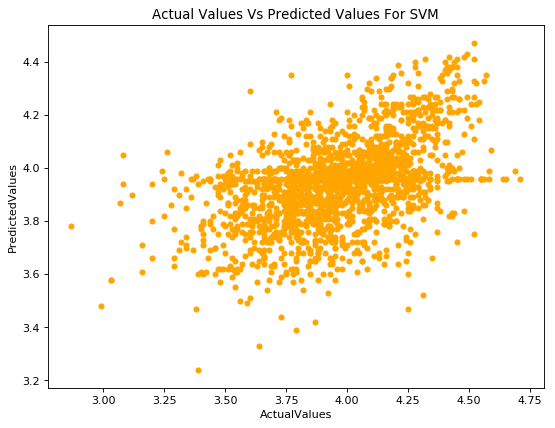

In [38]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_pred_svm,color = 'orange', s= 20.0)
plt.xlabel("ActualValues")
plt.ylabel("PredictedValues")
plt.title("Actual Values Vs Predicted Values For SVM")

In [39]:
print('R^2 Score for SVR Model:', round(clf.score(X_imp_test, y_test),4))
###. Using Metrics
print('SVR Model Accuracy: ', metrics.r2_score(y_test, y_pred_svm))
print('Mean Absolute Error for SVR Model:', round(metrics.mean_absolute_error(y_test, y_pred_svm),4))  
print('Mean Squared Error for SVR Model:', round(metrics.mean_squared_error(y_test, y_pred_svm),4))   
print('Root Mean Squared Error for SVR Model:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svm)),4))

R^2 Score for SVR Model: 0.2401
SVR Model Accuracy:  0.24004331564825154
Mean Absolute Error for SVR Model: 0.1798
Mean Squared Error for SVR Model: 0.0545
Root Mean Squared Error for SVR Model: 0.2335


## Conclusion

We have implemented different models to predict the **Average_Rating** of a book and the **Random Forest Model** did the best. 

#### Compare Actual Values vs Predicted Values for different Models

In [40]:
actual_values = np.asarray(y_test.average_rating)
y_pred_lm = y_pred_lm.tolist()
y_pred_lm = list(itertools.chain.from_iterable(y_pred_lm))
lm_pred_values = np.asarray(y_pred_lm)
rf_pred_values = np.asarray(y_rf_final)
svr_pred_values = np.asarray(y_pred_svm)
results = pd.DataFrame({'actual_values':actual_values, 
                        'lm_pred_values':lm_pred_values,
                        'rf_pred_values':y_rf_final,
                        'svr_pred_values':svr_pred_values})
results.head()

,actual_values,lm_pred_values,rf_pred_values,svr_pred_values
0,3.81,4.01,3.77,3.84
1,3.94,4.20,3.87,3.94
2,3.56,3.63,3.77,3.50
3,4.20,3.87,4.07,4.09
4,3.94,4.19,3.97,3.98


[Text(0, 0, 'actual_values'),
 Text(0, 0, 'lm_pred_values'),
 Text(0, 0, 'rf_pred_values'),
 Text(0, 0, 'svr_pred_values')]

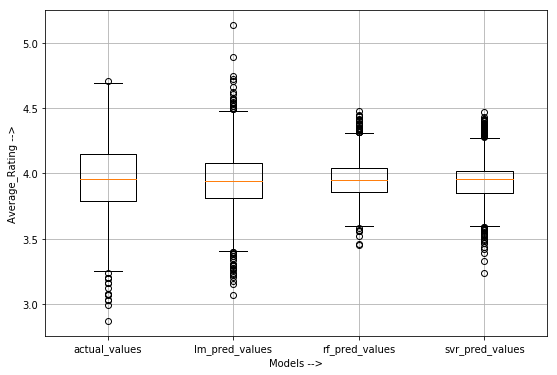

In [47]:
values = [results.actual_values,results.lm_pred_values,results.rf_pred_values,results.svr_pred_values]
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
ax.grid(True)
# Create the boxplot
bp = ax.boxplot(values)
ax.set_xlabel('Models -->')
ax.set_ylabel('Average_Rating -->')
ax.set_xticklabels(['actual_values', 'lm_pred_values', 'rf_pred_values','svr_pred_values'])
#ax.set_yticklabels(['3.0', '3.25', '3.5','3.75','4.0','4.25','4.5','4.75','5.0','5.25'])

In [60]:
print("Actual Mean:", round(np.mean(results.actual_values),3))
print("LinearRegression Mean:",round(np.mean(results.lm_pred_values),3))
print("RandomForest Mean:",round(np.mean(results.rf_pred_values),3))
print("SVR Mean:",round(np.mean(results.svr_pred_values),3))

Actual Mean: 3.96
LinearRegression Mean: 3.941
RandomForest Mean: 3.955
SVR Mean: 3.942


If we check the Mean value for the Average Rating, the value for the Random Forest Model is the closest to the Actual one. Although the other Models did okay, **Random Forest Model** is the best fit.